# Machine Learning Portfolio 2

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|Mohamed Belaachir|mobelaachir|Mo Belaachir|
|Jayden Debi-Tewari|Jaydendt1|jaydendt123|
|Quincy Soerohardjo|quincysoerohardjo2002|Quincy Soerohardjo|
|Mattias Aareleid|mattyonaize|Mattias Aareleid|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Modeling](#modeling)

- [Results](#results)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [49]:
# Libraries

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.fft import fft, ifft
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


## Data Overview

In [32]:
train = pd.read_csv('train.csv', parse_dates=['date_hour'], index_col='date_hour')
test = pd.read_csv('test.csv', parse_dates=['date_hour'], index_col='date_hour')
sample_submission = pd.read_csv('sample_submission.csv')

In [33]:
# Train and Test data
display(train.head(10), test.head(10))

,holiday,weathersit,temp,atemp,hum,windspeed,cnt
date_hour,,,,,,,
2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0000,16
2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0000,40
2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0000,32
2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0000,13
2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0000,1
2011-01-01 05:00:00,0,2,0.24,0.2576,0.75,0.0896,1
2011-01-01 06:00:00,0,1,0.22,0.2727,0.80,0.0000,2
2011-01-01 07:00:00,0,1,0.20,0.2576,0.86,0.0000,3
2011-01-01 08:00:00,0,1,0.24,0.2879,0.75,0.0000,8


,holiday,weathersit,temp,atemp,hum,windspeed
date_hour,,,,,,
2012-12-01 00:00:00,0,1,0.26,0.3030,0.81,0.0000
2012-12-01 01:00:00,0,1,0.26,0.3030,0.81,0.0000
2012-12-01 02:00:00,0,2,0.26,0.3030,0.81,0.0000
2012-12-01 03:00:00,0,2,0.26,0.2727,0.81,0.1343
2012-12-01 04:00:00,0,1,0.26,0.2879,0.81,0.0896
2012-12-01 05:00:00,0,1,0.24,0.2576,0.87,0.0896
2012-12-01 06:00:00,0,1,0.24,0.2424,0.87,0.1343
2012-12-01 07:00:00,0,2,0.24,0.2424,0.87,0.1343
2012-12-01 08:00:00,0,2,0.24,0.2424,0.87,0.1343


In [34]:
# Sample submission for kaggle
display(sample_submission.head(10))

,date_hour,cnt
0,2012-12-01 00:00:00,784
1,2012-12-01 01:00:00,80
2,2012-12-01 02:00:00,605
3,2012-12-01 03:00:00,604
4,2012-12-01 04:00:00,544
5,2012-12-01 05:00:00,100
6,2012-12-01 06:00:00,344
7,2012-12-01 07:00:00,18
8,2012-12-01 08:00:00,57
9,2012-12-01 09:00:00,603


## Exploratory Data Analysis

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16637 entries, 2011-01-01 00:00:00 to 2012-11-30 23:00:00
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     16637 non-null  int64  
 1   weathersit  16637 non-null  int64  
 2   temp        16637 non-null  float64
 3   atemp       16637 non-null  float64
 4   hum         16637 non-null  float64
 5   windspeed   16637 non-null  float64
 6   cnt         16637 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.0 MB


In [36]:
cat_col = ['holiday', 'weathersit']
num_col = ['temp','atemp','hum','windspeed']
target = 'cnt'

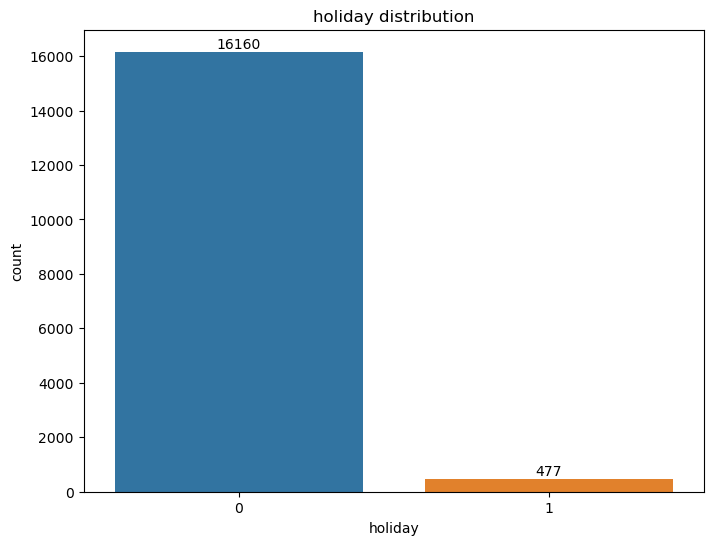

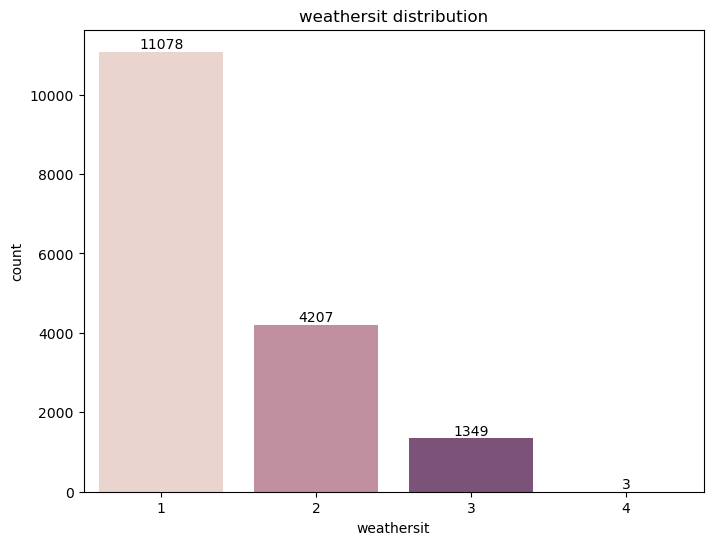

In [37]:
for col in cat_col:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=train, x=col, hue=col, legend=False)

    for bar in ax.patches:
        # Get the height of each bar (the count)
        count = int(bar.get_height())
        if count > 0:  # Only annotate bars with count greater than 0
            ax.annotate(f'{count}', 
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                        ha='center', 
                        va='bottom')
    
    ax.set_title(f'{col} distribution')
    plt.show()

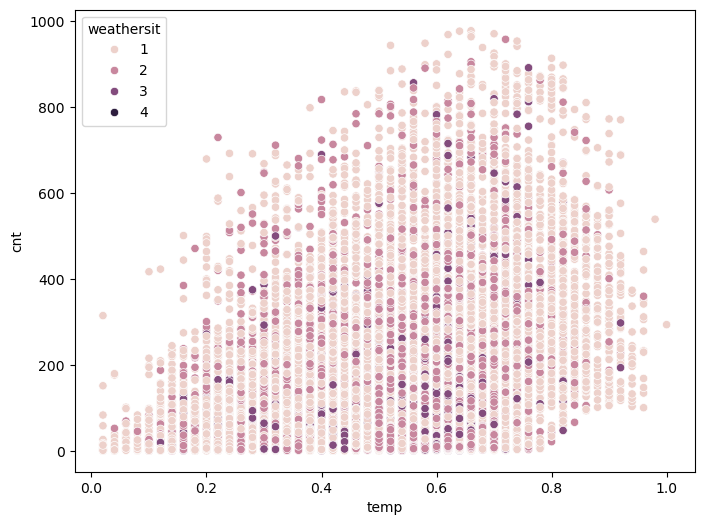

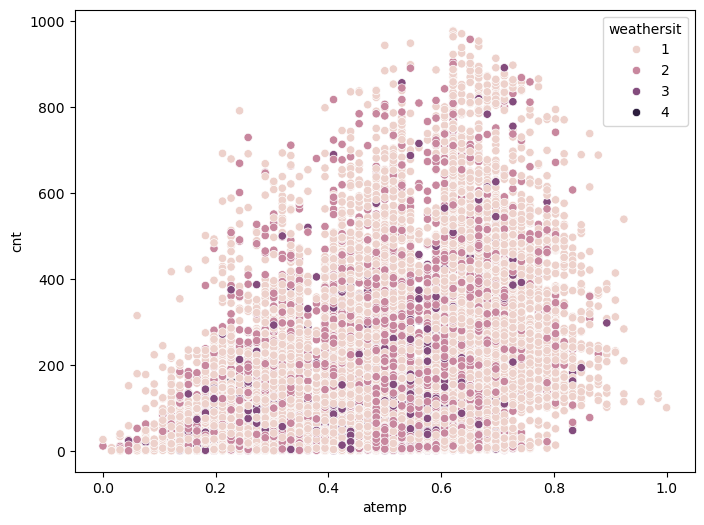

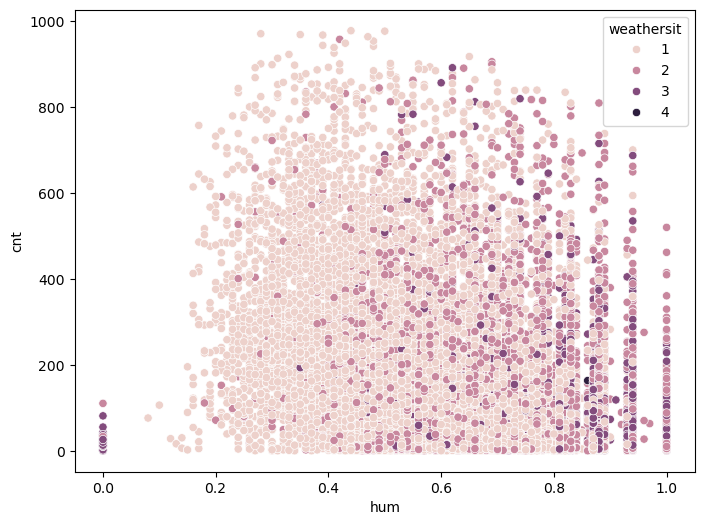

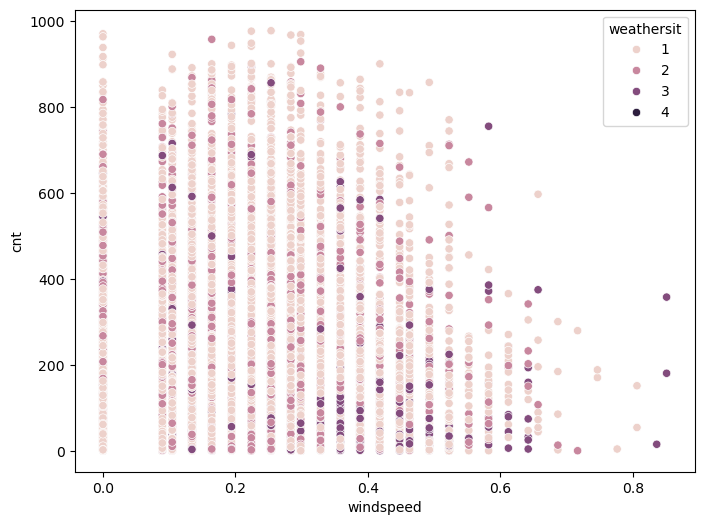

In [38]:
for col in num_col:
    plt.figure(figsize=(8,6))
    ax = sns.scatterplot(data=train, x=col, y=target, hue='weathersit')
    plt.show()

In [44]:
train2011 = train[(train.index >= '2011') & (train.index < '2012')]
train2012 = train[(train.index >= '2012') & (train.index < '2013')]

<function matplotlib.pyplot.show(close=None, block=None)>

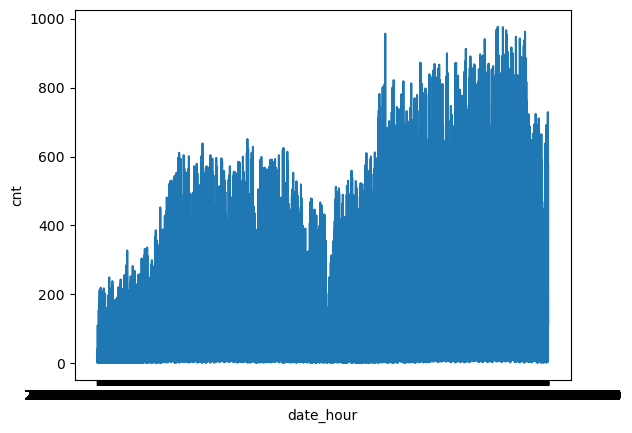

In [13]:
sns.lineplot(data=train, x=train.index, y=target)
plt.show

## Feature Engineering

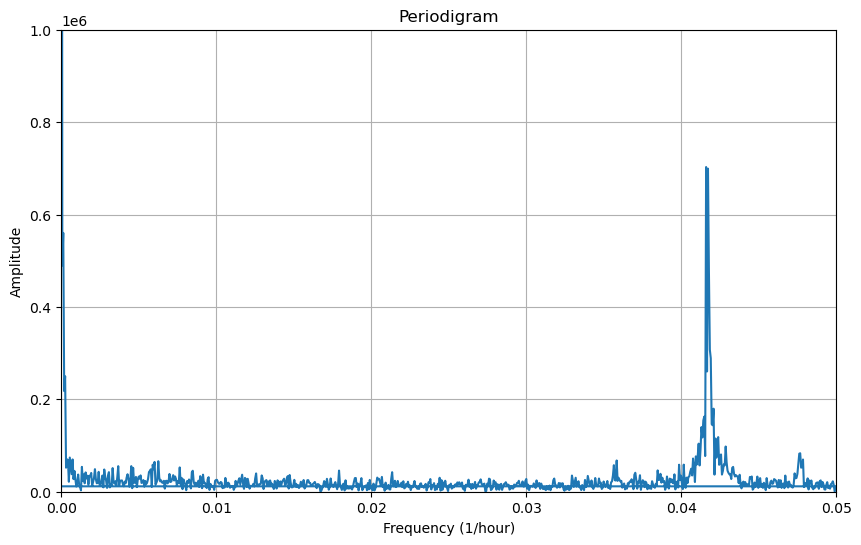

In [46]:
tijdreeks = train['cnt']
n = len(tijdreeks)
freq = np.fft.fftfreq(n,1)
fft_result = fft(tijdreeks)

plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(fft_result))
plt.xlabel('Frequency (1/hour)')
plt.ylabel('Amplitude')
plt.xlim([0,0.05])
plt.ylim([0,1e6])
plt.title('Periodigram')
plt.grid(True)
plt.show()

In [47]:
df_fft = pd.DataFrame(np.abs(fft_result))
df_fft['freq'] = freq
hours = []
days= []
for f in freq:
    if f != 0:
        hours.append(1/f)
        days.append(1/f/24)
    else:
        hours.append(np.inf)
        days.append(np.inf)
df_fft['duur in uren'] = hours
df_fft['duur in dagen'] = days
df_fft.rename(columns={0:'amplitude'}, inplace=True)
df_fft = df_fft[(df_fft['amplitude'] > 0.4e+06)&(df_fft['freq'] > 0)]
df_fft


,amplitude,freq,duur in uren,duur in dagen
1,489864.299841,0.000060,16637.000000,693.208333
2,560236.241034,0.000120,8318.500000,346.604167
692,702799.953019,0.041594,24.041908,1.001746
694,699280.808600,0.041714,23.972622,0.998859
695,479527.144257,0.041774,23.938129,0.997422


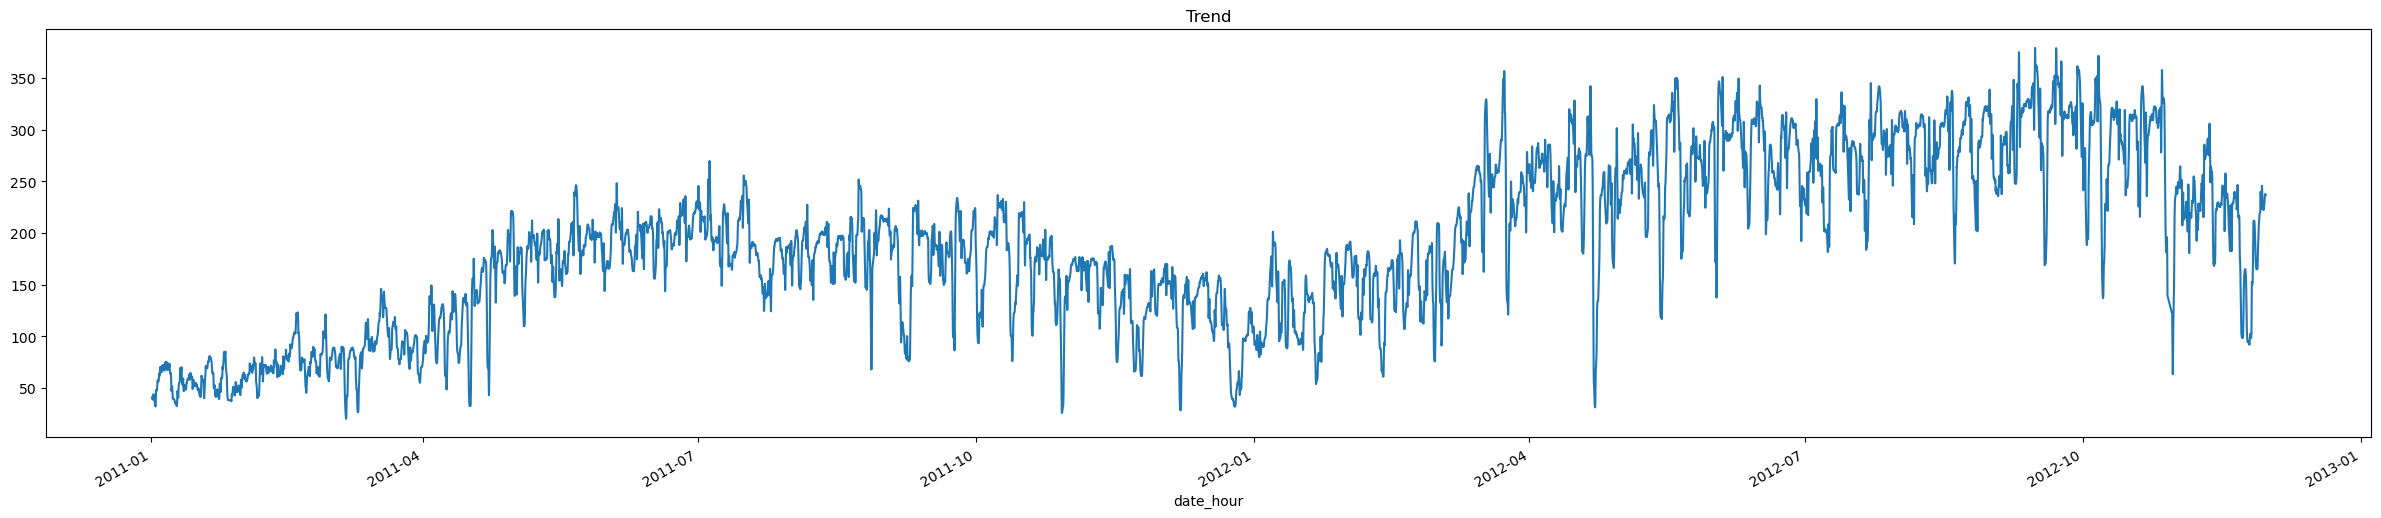

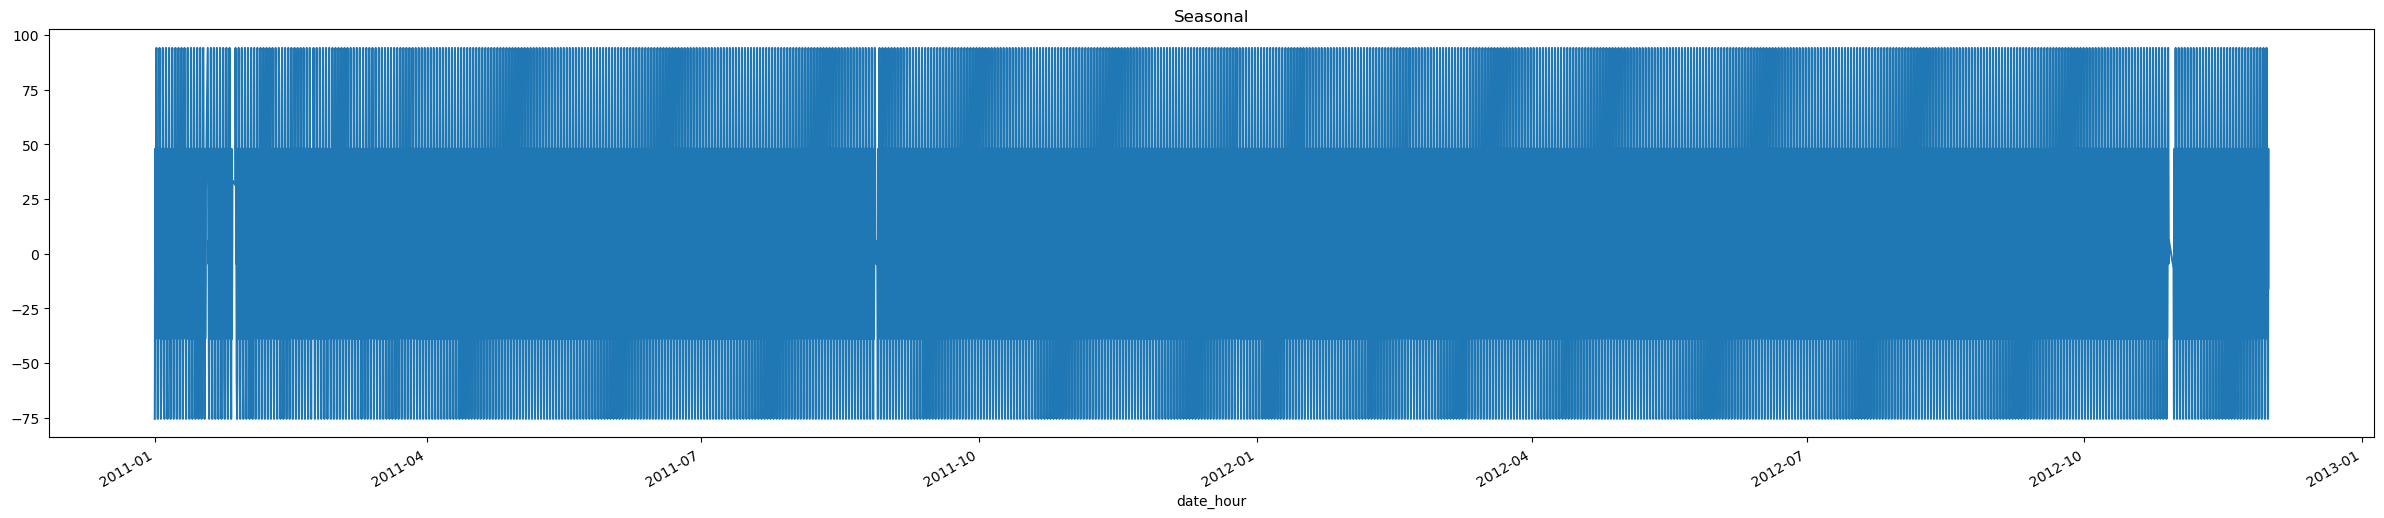

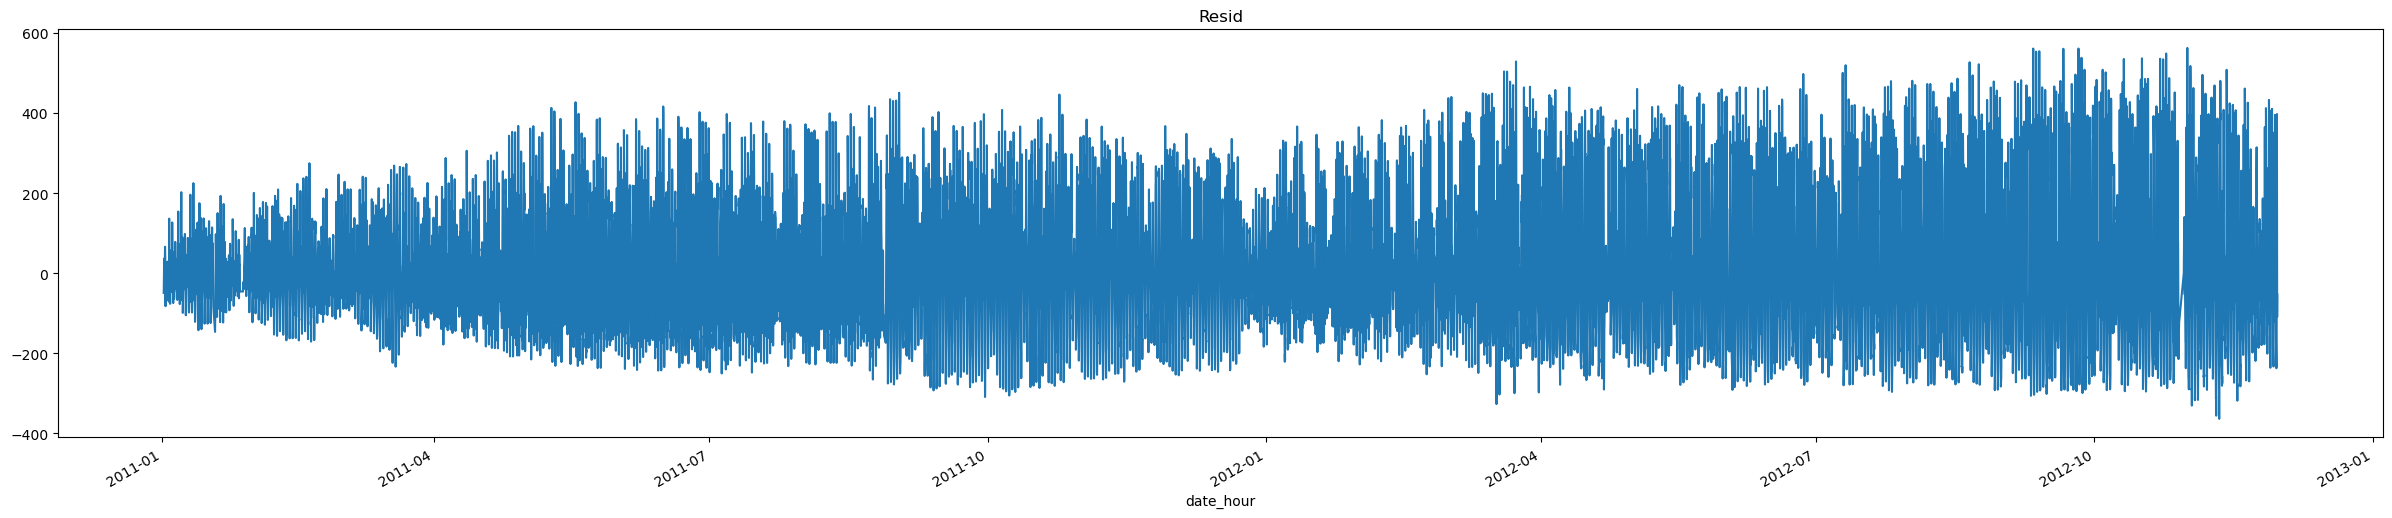

In [50]:
sd = seasonal_decompose(train['cnt'], model='additive', period=24)
plt.figure(figsize=(30,6))
plt.title("Trend")
sd.trend.plot()
plt.figure(figsize=(30,6))
plt.title("Seasonal")
sd.seasonal.plot()
plt.figure(figsize=(30,6))
plt.title("Resid")
sd.resid.plot()
plt.show()

## Modeling

## Results

## Conclusion & Advice

## Sources